### Kernel Density Estimates Example :  Presidents' time in office

In Chapter 2-3 of Philip Janert's "Data Analysis with Open Source Tools" (O'Reilly, 2009), an example of a kernel density estimates as an improvement over histograms for univariate data.  The code is written using the Numpy library without using any KDE-specific calls.  The particular dataset is of U.S. presidents' months in office, amended here to include Obama's two terms.  General mathematical equations are given for Gaussian, Epanechnikov and Boxcar KDEs and an implementation for the Gaussian form is given using the Numpy library, but without code for plotting despite the visualization inserted as a figure in the text.

The presentation below merely adds a Numpy implementation for the Epanechnikov formula and completes the visualization code using matplotlib.  This first cell presents the initial Janert code.  The *z* (position) parameter will be used for each *x* interval value in the linspace division of the range of month values.  In other words, each of the 1000 segments in the time dimension is evaluated against all of the same 1000 segments, resulting in 1000000 calculations. Note that Numpy broadcasting and a ufunc is used in the handling of the array *xv*. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# z: position, w: bandwidth, xv: vector of points
def gaussian_kde( z, w, xv ):
    return np.sum( np.exp(-0.5*((z-xv)/w)**2)/np.sqrt(2*np.pi*w**2) )


The following function is added, derived from Janert's version of the Epanechnikov mathematical equation.  The bandwidth is adjusted in the calling code to be double that used for the Gaussian function.  Note that the condition *if* reduces the number of resulting point to 2883 out of the possible 1000000.

In [2]:
def epanechnikov_kde(z, w, xv):
    return np.sum([0.75*(1 - ((z-xv[i])/w)**2)/w for i in range(len(xv)) \
           if (np.abs(z - xv[i])/ w) <= 1])       


Resuming Janert's code loading the data from a file.  The bandwidth is somewhat arbitrarily set.  Following that, Janert's code is adjusted to accomodate two kde's.  The x-dimension is equally divided into 1000 increments.  Empty arrays are created to receive the kde calculations.   

In [3]:
# first col is sequential index, second is presidents' names, 
# just use third col =  counts of days
d = np.loadtxt( "janert_ch02_presidents", usecols=(2,) )

#bandwidth
w = 2.5

#increments
x_inc = 1000

xs = np.linspace( min(d)-w, max(d)+w, x_inc )
gauss_ys = np.zeros(shape=(x_inc,1))
epani_ys = np.zeros(shape=(x_inc,1))


It does not seem possible to plot the kde functions as can easily be done as in *plot(x, sin(x))* since each point of the linspace is evaluated over twice and a broadcasting error would be generated. So, the more long-winded solution here is to calculate the y values in a loop.

In [4]:
i = 0

for x in xs:
    gauss_ys[i] = gaussian_kde( x, w, d )
    epani_ys[i] = epanechnikov_kde( x, w*2, d )
    i += 1


And finally the plot:

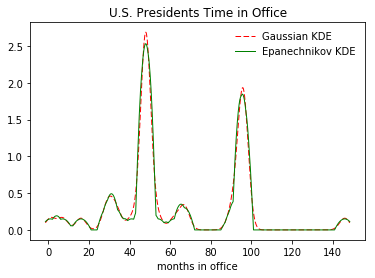

In [5]:
%matplotlib inline
plt.title('U.S. Presidents Time in Office')
plt.xlabel('months in office')
plt.plot(xs, gauss_ys, 'r--', lw=1.0, label="Gaussian KDE")
plt.plot(xs, epani_ys, 'g', lw=1.0, label="Epanechnikov KDE")
plt.legend(loc='upper right', frameon=False)